This is Will's edit of a notebook originally written by Javier.

# Correlations between H II region parameters

We look at correlations between 6 principal measurements that fall into two groups: 

* Basic parameters: 
    * Size: $L$
    * Ionizing luminosity: $Q(\mathrm{H})$
    * Distance: $D$
* Velocity structure function parameters:
    * Velocity dispersion on plane of sky: $\sigma$
    * Velocity autocorrelation length scale: $\ell_0$
    * Structure function slope in inertial range: $m$

Colab's markdown renderer seems to have a bug that requires some math outside of a list in order to trigger latex parsing: $\alpha$. 

## Original table from Javier

In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import lmfit
import statsmodels.api as sm
import linmix
from scipy.stats import pearsonr
#import sys

In [2]:
Region =["NGC 604","NGC 595","Hubble X","Hubble V","30Dor" ,"Carina","NGC 346","M8"   ,"OrionL","OrionS"]
LHa    =[4.46e39  ,2.29e39  ,3.98e38   ,7.41e38   ,5.74e39 ,3.98e39 ,4.67e38  ,2.95e37,1e37    ,1e37    ]
SFR    =[5.3e-3   ,2.6e-3   ,3.1e-4    ,1.5e-4    ,1.3e-2  ,1.0e-2  ,0.0021   ,1.0e-4 ,5.3e-5  ,5.3e-5  ]
n      =[3        ,4        ,5         ,8         ,250     ,500     ,100      ,60     ,150     ,4000    ] 
Diam   =[400      ,400      ,160       ,130       ,98.9    ,5       ,64       , 25    ,5       ,0.6     ]
R      =[200      ,200      ,80        ,65        ,49.4    ,7.5     ,32       ,12.5   ,2.5     ,0.3     ]
Dist   =[840      ,840      ,500       ,500       ,50      ,2.35    ,61.7     ,1.25   ,0.4     ,0.4     ]
siglos =[16.21    ,18.33    ,12.3      ,13.4      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]
sigW   =[23.1     ,27.1     ,13.4      ,14.7      ,31.7    ,22.46   ,10.2     ,13.6   ,6       ,6       ]

Confidence intervals with sigma fixed

In [3]:
sig    =[7.39     ,6.64     ,2.8       ,3.59      ,15.8    ,4.22    ,5.6      ,2.7    ,3.23    ,3.1     ]
r0     =[8.75     ,8.99     ,3.62      ,2.7       ,2.69    ,0.53    ,1.4      ,1.78   ,0.84    ,0.062   ]
r0er   =[0.75     ,0.71     ,0.18      ,0.24      ,0.08    ,0.12    ,0.75     ,0.07   ,0.37    ,0.003   ]
m      =[1.95     ,1.75     ,1.7       ,1.62      , 1.22   ,1.19    ,1.13     ,1.36   ,0.9     ,1.44    ]
mer    =[0.14     ,0.10     ,0.09      ,0.11      ,0.02    ,0.20    ,0.03     ,0.05   ,0.04    ,0.11    ]

Confidence intervals with sigma float

In [4]:
sig2    =[43.46    ,36.56    ,12.77     ,7.88      ,300.67  ,19.99   ,38.01    ,7.29    ,5.28   ,6.68  ]
sig2er  =[5.05     ,3.36     ,0.69      ,0.72      ,27.97   ,3.08    ,3.69     ,0.72    ,12.3   ,0.53  ]
r02     =[6.9      ,8.04     ,3.61      ,2.78      ,3.4     ,0.54    ,1.89     ,1.78   ,0.6    ,0.042 ]
r02er   =[0.83     ,0.85     ,0.21      ,0.35      ,0.44    ,0.18    ,0.35     ,0.17   ,1.88   ,0.004 ]
m2      =[2.07     ,1.83     ,1.72      ,1.62      ,1.18    ,0.98    ,1.05     ,1.36   ,2.17   ,1.65  ]
m2er    =[0.23     ,0.12     ,0.16      ,0.28      ,0.02    ,0.37    ,0.04     ,0.13   ,1.78   ,0.07  ]

In [5]:
data = pd.DataFrame(
    {
       "Region": Region,
       "LHa": LHa,
       "SFR": SFR,
       "n": n,
       "L [pc]": Diam,
       "R [pc]": R,
       "Dist [kpc]": Dist,
       "sig [km/s]": sig,
       "sig2 [km/s]": sig2,
       "sig2er": sig2er,
       "m": m,
       "m2": m2,
       "mer": mer,
       "m2er": m2er,
       "r0 [pc]": r0,
       "r02 [pc]": r02,
       "r0er": r0er,
       "r02er": r02er,
       "siglos [km/s]": siglos,
      
    },
)

In [6]:
data['sig2 [km/s]']=data['sig2 [km/s]']**0.5

In [7]:
data['sig2er']=data['sig2er']**0.5

Checar que los tipos de las columnas sean adecuadas:

In [8]:
data.dtypes

Region            object
LHa              float64
SFR              float64
n                  int64
L [pc]           float64
R [pc]           float64
Dist [kpc]       float64
sig [km/s]       float64
sig2 [km/s]      float64
sig2er           float64
m                float64
m2               float64
mer              float64
m2er             float64
r0 [pc]          float64
r02 [pc]         float64
r0er             float64
r02er            float64
siglos [km/s]    float64
dtype: object

In [9]:
data

,Region,LHa,SFR,n,L [pc],R [pc],Dist [kpc],sig [km/s],sig2 [km/s],sig2er,m,m2,mer,m2er,r0 [pc],r02 [pc],r0er,r02er,siglos [km/s]
0,NGC 604,4.460000e+39,0.005300,3,400.0,200.0,840.00,7.39,6.592420,2.247221,1.95,2.07,0.14,0.23,8.750,6.900,0.750,0.830,16.21
1,NGC 595,2.290000e+39,0.002600,4,400.0,200.0,840.00,6.64,6.046487,1.833030,1.75,1.83,0.10,0.12,8.990,8.040,0.710,0.850,18.33
2,Hubble X,3.980000e+38,0.000310,5,160.0,80.0,500.00,2.80,3.573514,0.830662,1.70,1.72,0.09,0.16,3.620,3.610,0.180,0.210,12.30
3,Hubble V,7.410000e+38,0.000150,8,130.0,65.0,500.00,3.59,2.807134,0.848528,1.62,1.62,0.11,0.28,2.700,2.780,0.240,0.350,13.40
4,30Dor,5.740000e+39,0.013000,250,98.9,49.4,50.00,15.80,17.339839,5.288667,1.22,1.18,0.02,0.02,2.690,3.400,0.080,0.440,31.70
5,Carina,3.980000e+39,0.010000,500,5.0,7.5,2.35,4.22,4.471018,1.754993,1.19,0.98,0.20,0.37,0.530,0.540,0.120,0.180,22.46
6,NGC 346,4.670000e+38,0.002100,100,64.0,32.0,61.70,5.60,6.165225,1.920937,1.13,1.05,0.03,0.04,1.400,1.890,0.750,0.350,10.20
7,M8,2.950000e+37,0.000100,60,25.0,12.5,1.25,2.70,2.700000,0.848528,1.36,1.36,0.05,0.13,1.780,1.780,0.070,0.170,13.60
8,OrionL,1.000000e+37,0.000053,150,5.0,2.5,0.40,3.23,2.297825,3.507136,0.90,2.17,0.04,1.78,0.840,0.600,0.370,1.880,6.00
9,OrionS,1.000000e+37,0.000053,4000,0.6,0.3,0.40,3.10,2.584570,0.728011,1.44,1.65,0.11,0.07,0.062,0.042,0.003,0.004,6.00


## Change to log scale for most parameters

El analisis de la mayoría de las columnas sería mejor en escala logarítmica porque varían por varios ordenes de magnitud.  Entonces, hacemos una nueva versión de la tabla así. Dejamos la $m$ en escala lineal porque no varía mucho.

In [10]:
cols = data.columns
logdata = data.copy()
for col in cols:
    if col not in ["Region", "m", "mer","m2","m2er"]:
        logdata[col] = np.round(np.log10(logdata[col]), 2)
        logdata.rename(columns={col: f"log {col}"}, inplace=True)
# Some minor changes to column names
logdata.rename(
    columns={
        "log LHa": "log L(H) [erg s^-1]",
        }, 
    inplace=True)
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig [km/s],log sig2 [km/s],log sig2er,m,m2,mer,m2er,log r0 [pc],log r02 [pc],log r0er,log r02er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,0.87,0.82,0.35,1.95,2.07,0.14,0.23,0.94,0.84,-0.12,-0.08,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,0.82,0.78,0.26,1.75,1.83,0.10,0.12,0.95,0.91,-0.15,-0.07,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,0.45,0.55,-0.08,1.70,1.72,0.09,0.16,0.56,0.56,-0.74,-0.68,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.56,0.45,-0.07,1.62,1.62,0.11,0.28,0.43,0.44,-0.62,-0.46,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,1.20,1.24,0.72,1.22,1.18,0.02,0.02,0.43,0.53,-1.10,-0.36,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,0.63,0.65,0.24,1.19,0.98,0.20,0.37,-0.28,-0.27,-0.92,-0.74,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,0.75,0.79,0.28,1.13,1.05,0.03,0.04,0.15,0.28,-0.12,-0.46,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.43,0.43,-0.07,1.36,1.36,0.05,0.13,0.25,0.25,-1.15,-0.77,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,0.51,0.36,0.54,0.90,2.17,0.04,1.78,-0.08,-0.22,-0.43,0.27,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.49,0.41,-0.14,1.44,1.65,0.11,0.07,-1.21,-1.38,-2.52,-2.40,0.78


Make the label text bigger on the figures

In [11]:
sns.set_context("talk")

Repeat the pair plot of correlations between columns with the log-scale quantities. Use color to indicate the distance to the regions.

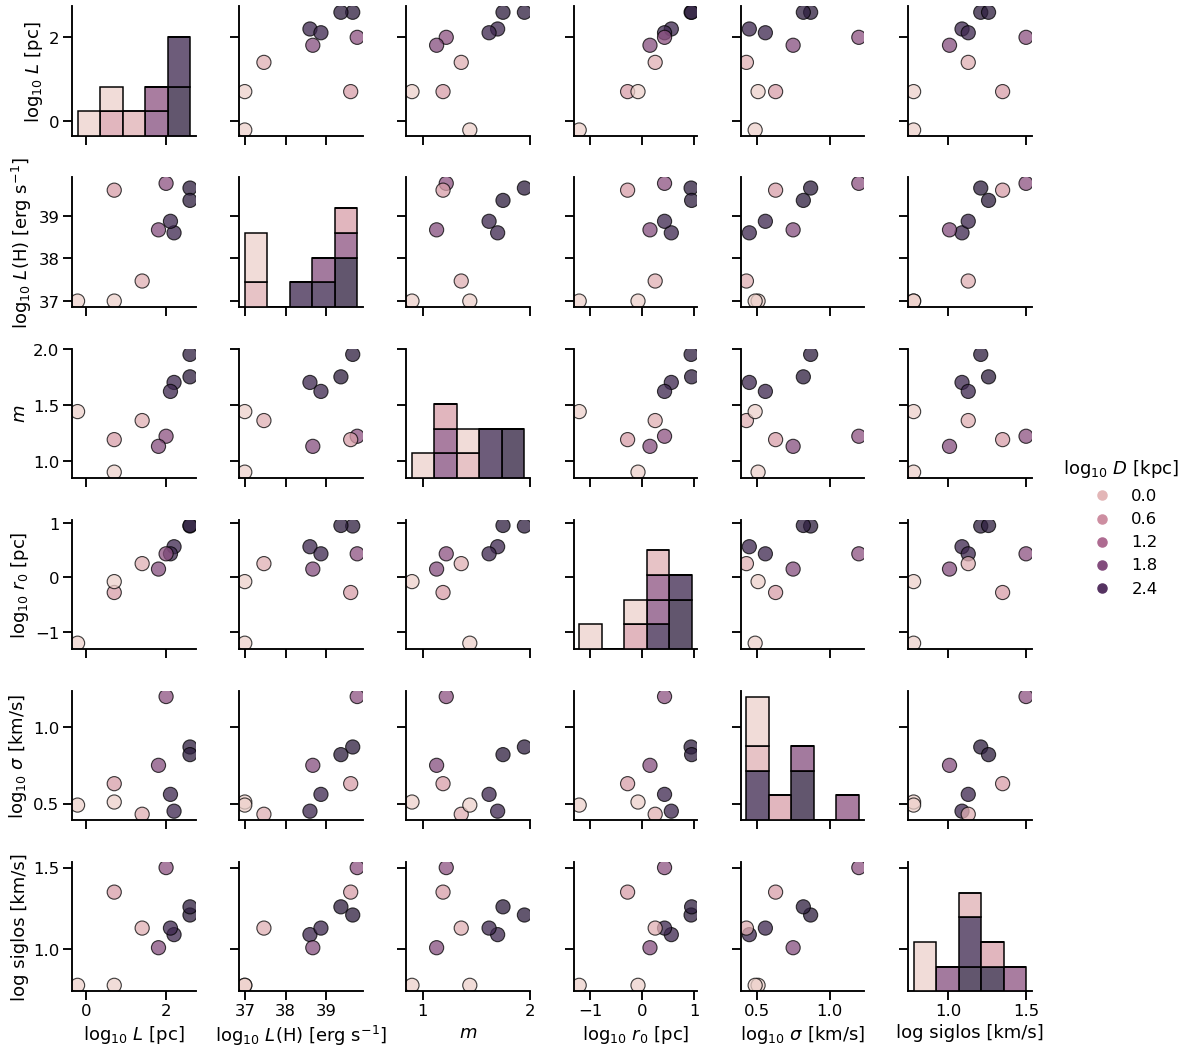

In [12]:
selected_vars = [ "log L [pc]","log L(H) [erg s^-1]", "log Dist [kpc]", "m", "log r0 [pc]", "log sig [km/s]", "log siglos [km/s]"]
plotdata = logdata[selected_vars].rename(
    columns={
        # Switch column names to use latex formatting to improve axis labels
        "log L [pc]": r"$\log_{10}\ L$ [pc]", 
        "log L(H) [erg s^-1]": r"$\log_{10}\ L(\mathrm{H})$ [erg s$^{-1}$]", 
        "m": "$m$", 
        "log r0 [pc]": r"$\log_{10}\ r_0$ [pc]", 
        "log sig [km/s]": r"$\log_{10}\ \sigma$ [km/s]", 
        "log Dist [kpc]": r"$\log_{10}\ D$ [kpc]",
    },
)

sns.pairplot(plotdata, 
             hue=r"$\log_{10}\ D$ [kpc]",
             plot_kws=dict(alpha=0.75, s=200, edgecolor="k"), 
             diag_kind='hist',
             diag_kws= dict(multiple='stack'),
             );

figname = "strucfunc-correlations"
# Save PDF and JPG versions of the figure
#plt.gcf().savefig(f"{figname}.pdf")
#plt.gcf().savefig(f"{figname}.jpg")

## Correlation coefficients

Calculate [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), $r$, between each pair of variables:

In [13]:
logdata[selected_vars].corr()

,log L [pc],log L(H) [erg s^-1],log Dist [kpc],m,log r0 [pc],log sig [km/s],log siglos [km/s]
log L [pc],1.000000,0.674686,0.923364,0.599839,0.965392,0.466705,0.555372
log L(H) [erg s^-1],0.674686,1.000000,0.714755,0.392892,0.620690,0.718054,0.875549
log Dist [kpc],0.923364,0.714755,1.000000,0.725915,0.820690,0.414552,0.477683
m,0.599839,0.392892,0.725915,1.000000,0.523512,0.064443,0.237977
log r0 [pc],0.965392,0.620690,0.820690,0.523512,1.000000,0.417942,0.550610
log sig [km/s],0.466705,0.718054,0.414552,0.064443,0.417942,1.000000,0.685530
log siglos [km/s],0.555372,0.875549,0.477683,0.237977,0.550610,0.685530,1.000000


So the results for correlations between the basic parameters are what we would expect:

- Size is moderately correlated with luminosity ($r = 0.67$).  The correlation is only weak because size will also depend on ambient density and the age of the region. 
- Size is highly correlated with distance ($r = 0.92$).  This is just a selection effect due to the fact that we tend to choose regions that have an angular size that matches our instruments. 
- Luminosity–distance correlation is the weakest ($r = 0.71$), and can be explained as being due to the previous two.



The correlations of the structure function parameters with the basic parameters are very interesting:
- Autocorrelation length scale, $r_0$, is *highly* correlated ($r = 0.96$) with region size, $L$.  Looking at the graph, the relation seems to be approximately linear with $\ell_0 \approx 0.1 L$.  How much of this correlation is real and how much is down to selection effects is something we need to consider carefully.
- Velocity dispersion, $\sigma$, is well correlated ($r = 0.71$) with luminosity, $L(\mathrm{Ha})$.  
- The structure function slope $m$ is well correlated ($r = 0.73$) with distance.  This is mainly because $m \approx 1.6$ for all the distant regions observed with TAURUS and ISIS, but is around $m = 1$ for all the nearby regions.  I suspect that this is mainly a data quality issue: we observe very little of the inertial range in the distant regions, so the determination of $m$ is probably not so reliable.  But I am not sure why this would tend to bias $m$ towards high values.  

In [14]:
logdata[selected_vars].corr()

,log L [pc],log L(H) [erg s^-1],log Dist [kpc],m,log r0 [pc],log sig [km/s],log siglos [km/s]
log L [pc],1.000000,0.674686,0.923364,0.599839,0.965392,0.466705,0.555372
log L(H) [erg s^-1],0.674686,1.000000,0.714755,0.392892,0.620690,0.718054,0.875549
log Dist [kpc],0.923364,0.714755,1.000000,0.725915,0.820690,0.414552,0.477683
m,0.599839,0.392892,0.725915,1.000000,0.523512,0.064443,0.237977
log r0 [pc],0.965392,0.620690,0.820690,0.523512,1.000000,0.417942,0.550610
log sig [km/s],0.466705,0.718054,0.414552,0.064443,0.417942,1.000000,0.685530
log siglos [km/s],0.555372,0.875549,0.477683,0.237977,0.550610,0.685530,1.000000


In [15]:
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig [km/s],log sig2 [km/s],log sig2er,m,m2,mer,m2er,log r0 [pc],log r02 [pc],log r0er,log r02er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,0.87,0.82,0.35,1.95,2.07,0.14,0.23,0.94,0.84,-0.12,-0.08,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,0.82,0.78,0.26,1.75,1.83,0.10,0.12,0.95,0.91,-0.15,-0.07,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,0.45,0.55,-0.08,1.70,1.72,0.09,0.16,0.56,0.56,-0.74,-0.68,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.56,0.45,-0.07,1.62,1.62,0.11,0.28,0.43,0.44,-0.62,-0.46,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,1.20,1.24,0.72,1.22,1.18,0.02,0.02,0.43,0.53,-1.10,-0.36,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,0.63,0.65,0.24,1.19,0.98,0.20,0.37,-0.28,-0.27,-0.92,-0.74,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,0.75,0.79,0.28,1.13,1.05,0.03,0.04,0.15,0.28,-0.12,-0.46,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.43,0.43,-0.07,1.36,1.36,0.05,0.13,0.25,0.25,-1.15,-0.77,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,0.51,0.36,0.54,0.90,2.17,0.04,1.78,-0.08,-0.22,-0.43,0.27,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.49,0.41,-0.14,1.44,1.65,0.11,0.07,-1.21,-1.38,-2.52,-2.40,0.78


## Significance tests

We can calculate the statistical significance of the correlations by using the Student t-statistic.  We test the null hypothesis that a given pair of variables is truly uncorrelated ($r = 0$) for the underlying population and that the observed $r$ for our sample of $N = 9$ sources arises solely by chance.  We want to calculate the $p$-value, which is the probability of obtaining $r$ greater than or equal to the observed value, given that there is no true correlation.  A small value of $p$ means that the null hypothesis can be rejected at a certain confidence level.  

First we calculate the t-statistic from the Pearson correlation coefficient:
$$
t = r \, \left(\frac{N - 2}{1 - r^2}\right)^{1/2}
$$
Then, we use the cumulative distribution function (CDF) of the t-distribution with $N - 1$ degrees of freedom to find the p-value. 

In [16]:
def tstatistic(r, n):
    """Compute Student t statistic for null hypothesis of no correlation
    for an observed Pearson correlation of `r` from `n` samples
    """
    return r*np.sqrt((n - 2) / (1 - r**2))

In [17]:
import scipy.stats

In [18]:
def p_from_t(t, n):
    """Compute 1-sided p-value from Student statistic `t` with `n` observations"""
    # sf is survival function: 1 - CDF
    return scipy.stats.t.sf(t, n-1)
    

In [19]:
N = 9
rvals = np.array([0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.779, 0.8, 0.9, 0.908, 0.95, 0.981])
tvals = tstatistic(rvals, N)
pvals = p_from_t(tvals, N)
pd.DataFrame(
    {"r": rvals, "t": tvals, "p": pvals}
)

,r,t,p
0,0.000,0.000000,5.000000e-01
1,0.200,0.540062,3.019294e-01
2,0.400,1.154701,1.407685e-01
3,0.500,1.527525,8.257494e-02
4,0.600,1.984313,4.124805e-02
5,0.700,2.593355,1.597303e-02
6,0.779,3.287020,5.535582e-03
7,0.800,3.527668,3.879201e-03
8,0.900,5.462793,2.997718e-04
9,0.908,5.733922,2.184923e-04


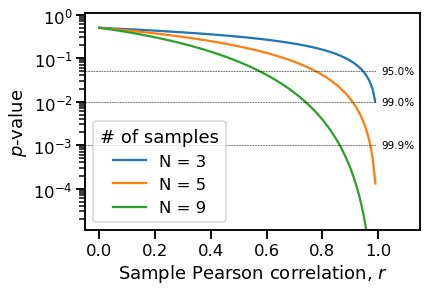

In [20]:
fig, ax = plt.subplots()
for N in 3, 5, 9:
    rvals = np.linspace(0.0, 1.0, 100, endpoint=False)
    tvals = tstatistic(rvals, N)
    pvals = p_from_t(tvals, N)
    ax.plot(rvals, pvals, label=f"N = {N}")
for p0 in 0.05, 0.01, 0.001:
    ax.axhline(p0, color="k", ls="--", lw=0.5)
    ax.text(1.07, p0, f"{100*(1-p0):.1f}%", 
            va="center", ha="center", fontsize="xx-small", 
            bbox={"color": "w"})
ax.legend(title="# of samples")
ax.set(
    xlabel="Sample Pearson correlation, $r$",
    ylabel="$p$-value",
    yscale="log",
    xlim=[-0.05, 1.15],
    ylim=[1.1e-5, 1.1],
);

I have marked confidence levels for nominal $p$-values of 0.05, 0.01, and 0.001, which are often used to judge significance.   This implies that all the correlations that we listed above are highly significant.  For instance, the correlation of $\sigma$ with luminosity, with $r=0.77$, has $p = 0.011$, so close to the 99% confidence level. 

Despite the good correlation, there is a factor of 4 difference in $\sigma$ between Carina and 30~Dor, despite similar luminosities.  **Need to check these luminostiy values**. 

In [21]:
logdata

,Region,log L(H) [erg s^-1],log SFR,log n,log L [pc],log R [pc],log Dist [kpc],log sig [km/s],log sig2 [km/s],log sig2er,m,m2,mer,m2er,log r0 [pc],log r02 [pc],log r0er,log r02er,log siglos [km/s]
0,NGC 604,39.65,-2.28,0.48,2.60,2.30,2.92,0.87,0.82,0.35,1.95,2.07,0.14,0.23,0.94,0.84,-0.12,-0.08,1.21
1,NGC 595,39.36,-2.59,0.60,2.60,2.30,2.92,0.82,0.78,0.26,1.75,1.83,0.10,0.12,0.95,0.91,-0.15,-0.07,1.26
2,Hubble X,38.60,-3.51,0.70,2.20,1.90,2.70,0.45,0.55,-0.08,1.70,1.72,0.09,0.16,0.56,0.56,-0.74,-0.68,1.09
3,Hubble V,38.87,-3.82,0.90,2.11,1.81,2.70,0.56,0.45,-0.07,1.62,1.62,0.11,0.28,0.43,0.44,-0.62,-0.46,1.13
4,30Dor,39.76,-1.89,2.40,2.00,1.69,1.70,1.20,1.24,0.72,1.22,1.18,0.02,0.02,0.43,0.53,-1.10,-0.36,1.50
5,Carina,39.60,-2.00,2.70,0.70,0.88,0.37,0.63,0.65,0.24,1.19,0.98,0.20,0.37,-0.28,-0.27,-0.92,-0.74,1.35
6,NGC 346,38.67,-2.68,2.00,1.81,1.51,1.79,0.75,0.79,0.28,1.13,1.05,0.03,0.04,0.15,0.28,-0.12,-0.46,1.01
7,M8,37.47,-4.00,1.78,1.40,1.10,0.10,0.43,0.43,-0.07,1.36,1.36,0.05,0.13,0.25,0.25,-1.15,-0.77,1.13
8,OrionL,37.00,-4.28,2.18,0.70,0.40,-0.40,0.51,0.36,0.54,0.90,2.17,0.04,1.78,-0.08,-0.22,-0.43,0.27,0.78
9,OrionS,37.00,-4.28,3.60,-0.22,-0.52,-0.40,0.49,0.41,-0.14,1.44,1.65,0.11,0.07,-1.21,-1.38,-2.52,-2.40,0.78


In [22]:
#logdata1=logdata.drop(4, axis=0)

r0 vs m

In [23]:
X, Xe, Y, Ye = [logdata[_] for _ in ['log r0 [pc]', 'log r0er','m', 'mer']]

In [24]:
Y=np.log10(Y)
Ye=np.log10(Ye)

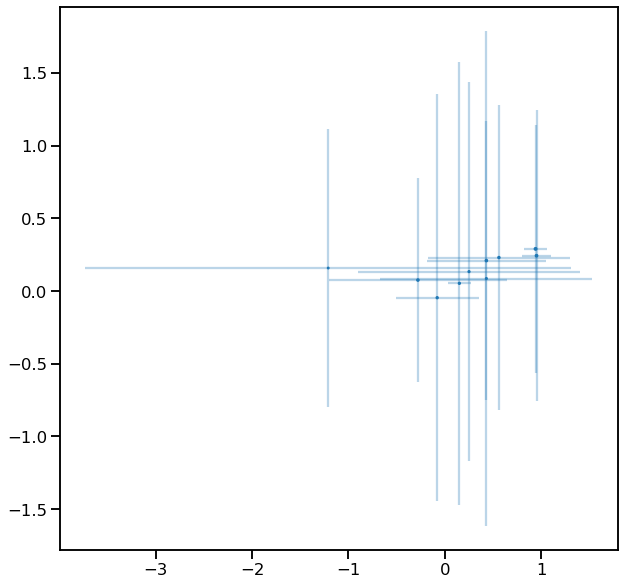

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

#ax.set(
#    xlim=[-0.2, 0.8], ylim=[-0.2, 0.8],
#    xlabel=r"$\log_{10}\, \Pi$", ylabel=r"$\log_{10}\, \Lambda$",
#)
#ax.set_aspect("equal")
#sns.despine()

In [26]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [27]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.36317468 1.46533476 1.13582368 1.17080244 0.99937671 1.55739744]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.07532935 1.10013845 1.04353822 1.0496041  1.00086953 1.23318972]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.08181968 1.09402524 1.01121657 1.01908267 0.9999832  1.17983331]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.0516548  1.0480362  1.01467357 1.01340796 0.99996067 1.0891424 ]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.03814867 1.03214402 1.0106116  1.01467918 0.99936384 1.05555667]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.01747274 1.0067911  1


Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00077246 0.99984499 1.00238216 1.00063929 0.99998449 1.00144301]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00052004 0.99984887 1.00201861 1.0007659  0.99997873 1.00140597]


In [28]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,2.157723,-1.853126,4.734869,"[0.17187347679620182, 0.8281265232037982]","[-0.6586047451811654, 0.49364516008905845]","[0.8513922841390912, 0.2384337848073149]",0.143384,0.512769,0.742790,0.295604,0.729903,-0.527925
1,0.298502,0.969119,1.800741,"[0.22200801003602066, 0.7779919899639792]","[0.5695323368254729, 0.562528327242691]","[0.49817973567899154, 0.2311522175388972]",0.910209,0.574254,0.491346,0.564083,0.538928,0.362705
2,0.926550,-1.261318,0.501008,"[0.14255206418236083, 0.8574479358176392]","[0.42875585279327777, 0.5743659961668197]","[0.16340655776591562, 0.15619649024779259]",0.059736,0.266148,0.249512,0.553609,0.399770,-0.580210
3,0.302804,-0.461443,1.328785,"[0.0070292649215901275, 0.9929707350784098]","[0.1679777778874782, 0.5667410750829092]","[1317.4746537205738, 0.13015009225959337]",0.698348,0.164318,0.080504,0.563938,3.064510,-0.775100
4,1.397120,-1.347793,1.284210,"[0.05798893126863403, 0.942011068731366]","[1.0446072506122948, 0.7216109337785065]","[4.574117966267083, 0.07733138941225427]",0.417200,0.167674,0.121849,0.740341,0.586340,-0.572006
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.005171,-0.965972,0.054469,"[0.8058088736269983, 0.1941911263730016]","[0.11554255948148232, 0.2692573955813409]","[0.05217259554298484, 0.25620975218467107]",0.574586,0.437902,0.076496,0.145393,0.309018,-0.787794
9996,0.128667,-1.659286,0.118982,"[0.8638825617201327, 0.13611743827986728]","[0.35422680986632027, 0.5272992095559073]","[0.04341693041250988, 0.17886783395489886]",0.739911,0.199995,0.214135,0.377785,0.255688,-0.775912
9997,0.207671,-1.022851,0.106492,"[0.5432399124874709, 0.4567600875125291]","[0.5003108032217394, 0.06498119825078474]","[0.1637451759536293, 0.08728231058368585]",-0.090656,0.167296,0.414083,0.301470,0.419337,-0.795846
9998,0.414086,-1.045233,0.120387,"[0.8740747052569176, 0.1259252947430824]","[0.6259183898107127, 0.10021145421043262]","[0.10937372149187688, 0.09864642190787816]",0.181696,0.211899,0.142453,0.559719,0.372078,-0.746196


In [29]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.107610,0.097130,0.649180,0.506566,0.204189,0.298268,0.513114,0.828192,0.043804
std,0.895397,1.326958,1.097883,0.447732,0.162786,0.369801,0.240127,8.215671,0.609385
min,-6.748614,-8.741334,0.000218,-2.025030,0.000627,0.000735,-0.941870,0.090297,-0.999998
25%,-0.380664,-0.636143,0.122834,0.253790,0.067090,0.073224,0.366611,0.357698,-0.487759
50%,0.115450,0.076252,0.330090,0.520422,0.158419,0.177008,0.523060,0.478084,0.067820
75%,0.584439,0.816739,0.752601,0.770860,0.313532,0.379806,0.666318,0.660882,0.595960
max,6.508582,9.940066,23.832718,3.155971,0.607563,7.123735,1.818664,613.517332,1.000000


In [30]:
pearsonr(X, Y)

(0.4832385732886732, 0.1571019118870487)

In [31]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,10.000000,10.000000,10.000000,10.000000
mean,0.214000,-0.787000,0.143417,-1.143663
std,0.636435,0.722942,0.103008,0.320076
min,-1.210000,-2.520000,-0.045757,-1.698970
25%,-0.022500,-1.055000,0.078250,-1.373713
50%,0.340000,-0.680000,0.145951,-1.022879
75%,0.527500,-0.220000,0.225215,-0.958607
max,0.950000,-0.120000,0.290035,-0.698970


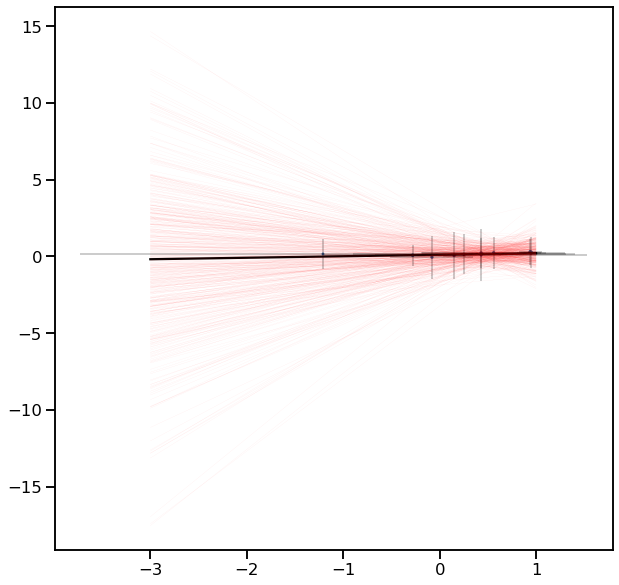

In [32]:
vmin, vmax = -3.0, 1.0
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [33]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.10761009152118609, 0.09713027735290891)

In [34]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.8953967426187182, 1.3269580473865863)

In [35]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.344
Model:                            WLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     4.194
Date:                Thu, 16 Sep 2021   Prob (F-statistic):             0.0747
Time:                        10:57:00   Log-Likelihood:                 11.019
No. Observations:                  10   AIC:                            -18.04
Df Residuals:                       8   BIC:                            -17.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1470      0.027      5.353      

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Diam(R) vs r0

Sig Fixed

In [36]:
X, Y, Ye = [logdata[_] for _ in ['log L [pc]', 'log r0 [pc]', 'log r0er']]

In [37]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:            log r0 [pc]   R-squared:                       0.905
Model:                            WLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           2.28e-05
Time:                        10:57:00   Log-Likelihood:                -1.4770
No. Observations:                  10   AIC:                             6.954
Df Residuals:                       8   BIC:                             7.559
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1782      0.209     -5.635      0.0

Sig Float

In [38]:
X, Y, Ye = [logdata[_] for _ in ['log L [pc]', 'log r02 [pc]', 'log r02er']]

In [39]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:           log r02 [pc]   R-squared:                       0.969
Model:                            WLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     249.3
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           2.59e-07
Time:                        10:57:01   Log-Likelihood:                 8.1554
No. Observations:                  10   AIC:                            -12.31
Df Residuals:                       8   BIC:                            -11.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6751      0.095     -7.080      0.0

L vs sig

sig fixed

In [40]:
X, Y = [logdata[_] for _ in ['log L(H) [erg s^-1]', 'log sig [km/s]']]

In [41]:
x,y=X,Y
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         log sig [km/s]   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     8.515
Date:                Thu, 16 Sep 2021   Prob (F-statistic):             0.0193
Time:                        10:57:01   Log-Likelihood:                 4.1459
No. Observations:                  10   AIC:                            -4.292
Df Residuals:                       8   BIC:                            -3.687
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.5409    

sig float

In [42]:
X, Y, Ye = [logdata[_] for _ in ['log L(H) [erg s^-1]', 'log sig2 [km/s]', 'log sig2er']]

In [43]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:        log sig2 [km/s]   R-squared:                       0.337
Model:                            WLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     4.067
Date:                Thu, 16 Sep 2021   Prob (F-statistic):             0.0784
Time:                        10:57:01   Log-Likelihood:                 5.6329
No. Observations:                  10   AIC:                            -7.266
Df Residuals:                       8   BIC:                            -6.661
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.4906    

Distance (R) vs m

Sigma fixed

In [44]:
X, Y, Ye = [logdata[_] for _ in ['log Dist [kpc]', 'm', 'mer']]

In [45]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      m   R-squared:                       0.301
Model:                            WLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     3.446
Date:                Thu, 16 Sep 2021   Prob (F-statistic):              0.100
Time:                        10:57:01   Log-Likelihood:               -0.55602
No. Observations:                  10   AIC:                             5.112
Df Residuals:                       8   BIC:                             5.717
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0526      0.102     10.

Sigma Float

In [46]:
X, Y, Ye = [logdata[_] for _ in ['log Dist [kpc]', 'm2', 'm2er']]

In [47]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                     m2   R-squared:                       0.091
Model:                            WLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.7997
Date:                Thu, 16 Sep 2021   Prob (F-statistic):              0.397
Time:                        10:57:02   Log-Likelihood:                -6.8818
No. Observations:                  10   AIC:                             17.76
Df Residuals:                       8   BIC:                             18.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3591      0.175      7.

sig vs siglos

In [48]:
X, Y, Ye = [logdata[_] for _ in ['log siglos [km/s]', 'log sig2 [km/s]', 'log sig2er']]

In [49]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:        log sig2 [km/s]   R-squared:                       0.130
Model:                            WLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.198
Date:                Thu, 16 Sep 2021   Prob (F-statistic):              0.305
Time:                        10:57:02   Log-Likelihood:                 4.2755
No. Observations:                  10   AIC:                            -4.551
Df Residuals:                       8   BIC:                            -3.946
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1209      0.33

L vs siglos

In [50]:
Moiseev=pd.read_csv('DataOthers//Moiseev2015.csv')
Ostin=pd.read_csv('DataOthers//Ostin2001.csv')
Blasco=pd.read_csv('DataOthers//Blasco2013.csv')
Rozas=pd.read_csv('DataOthers//Rozas2006.csv')
Ars=pd.read_csv('DataOthers//ArsRoy1986.csv')
Wis=pd.read_csv('DataOthers//Wis2012.csv')
Gal=pd.read_csv('DataOthers//Gallagher1983.csv')

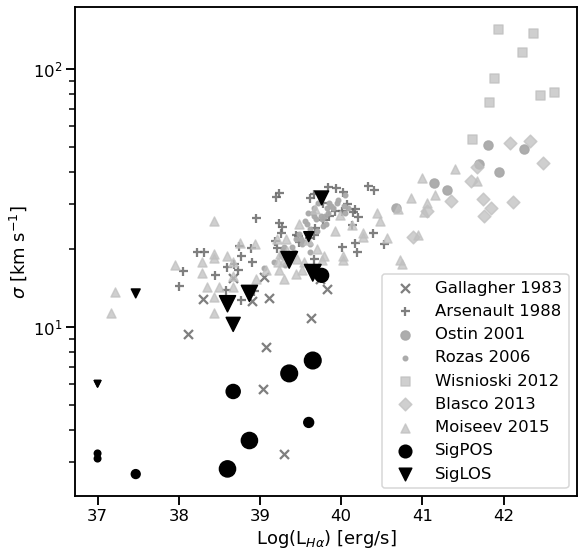

In [51]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')


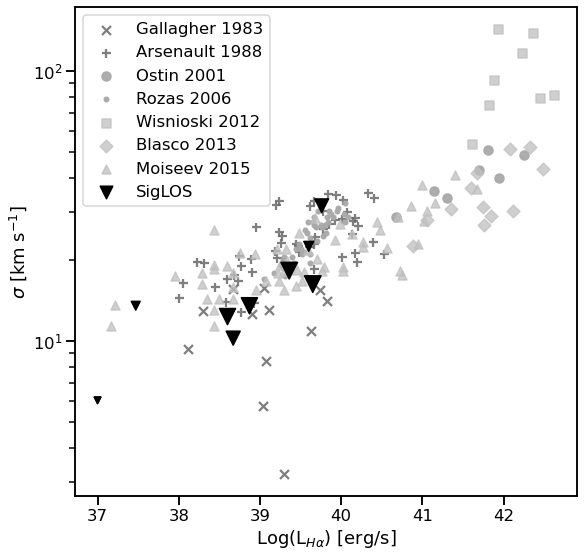

In [52]:
fig, ax=plt.subplots(figsize=(9,9))

plt.scatter(Gal.L,Gal.sig,label='Gallagher 1983',marker='x',alpha=0.85,color='dimgray')
plt.scatter(Ars.L,10**Ars.sig,label='Arsenault 1988',marker='+',alpha=0.85,color='dimgray')
plt.scatter(Ostin.L,Ostin.sig,label='Ostin 2001',marker='o',alpha=0.95,color='darkgray')
plt.scatter(Rozas.L,10**(Rozas.sig),label='Rozas 2006',marker='.',alpha=0.95,color='darkgray')
plt.scatter(Wis.L,Wis.sig,label='Wisnioski 2012',marker='s',alpha=0.75,color='silver')
plt.scatter(Blasco.L,Blasco.sig,label='Blasco 2013',marker='D',alpha=0.75,color='silver')
plt.scatter(Moiseev.L,Moiseev.sig,label='Moiseev 2015',marker='^',alpha=0.75,color='silver')

#plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log sig [km/s]']),marker='o',label='SigPOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)
plt.scatter(logdata['log L(H) [erg s^-1]'],10**(logdata['log siglos [km/s]']),marker='v',label='SigLOS',color='black',s=(logdata['log Dist [kpc]']+1.0)*70)

plt.yscale('log')

ax.set(
#    ylim  = [36, 43],
#    xlim  = [1, 150],
)
#ax.set_facecolor('whitesmoke')
ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='$σ$ [km s$^{-1}$]')
plt.legend()
#fig.savefig('SFplots//lvss.pdf', bbox_inches='tight')

In [53]:
globalL= pd.concat([Moiseev.L, Ostin.L.dropna(),Blasco.L.dropna(),Rozas.L.dropna(),Ars.L.dropna(),Wis.L.dropna(),Gal.L.dropna()], axis=0)
globalS= pd.concat([Moiseev.sig, Ostin.sig.dropna(),Blasco.sig.dropna(),10**Rozas.sig.dropna(),10**Ars.sig.dropna(),Wis.sig.dropna(),Gal.sig.dropna()],  axis=0)
GL=np.concatenate((np.array(globalL), np.array(logdata['log L(H) [erg s^-1]'])))
GS=np.concatenate((np.array(globalS), np.array(10**(logdata['log siglos [km/s]']))))

[Text(0, 0.5, 'Log$σ$ [km s$^{-1}$]'), Text(0.5, 0, 'Log(L$_{Hα}$) [erg/s]')]

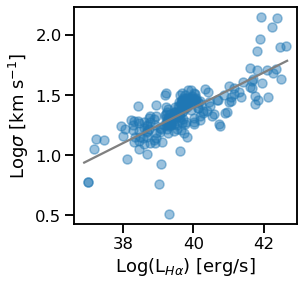

In [54]:
fig, ax=plt.subplots(figsize=(4,4))


plt.scatter(GL, np.log10(GS),alpha=0.45)

x2=np.logspace(1.567,1.63)
y2=-4.4928+0.1472*x2
plt.plot(x2,y2, color='gray')

ax.set(xlabel='Log(L$_{Hα}$) [erg/s]', ylabel='Log$σ$ [km s$^{-1}$]')


In [55]:
GSer = GS*.05

In [56]:
GLer = GS*.05

In [57]:
X, Xe, Y, Ye = [GL, GLer, np.log10(GS), np.log10(GSer)]

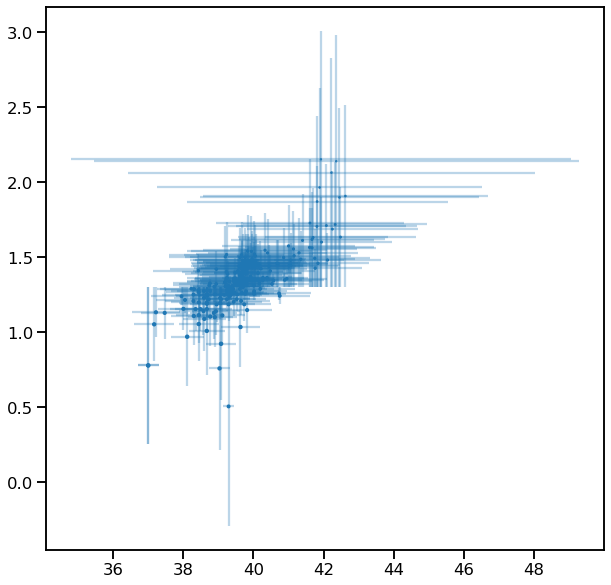

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
#plt.xscale('log')
#plt.yscale('log')

In [59]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [60]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.27755793 1.27878236 1.03098559 1.06050625 1.06750754 1.07731791]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.09988248 1.09980691 1.02399707 1.04480807 1.0570253  1.06740849]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.05725792 1.05719911 1.04961789 1.07849098 1.009133   1.09823367]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.05555687 1.05555906 1.0568112  1.0868662  1.00745241 1.07884897]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.04957097 1.04959113 1.04834196 1.11324697 1.03601531 1.08811914]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.03576948 1.03575615 1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.12050996 1.12120434 1.05596469 1.01967253 1.03772463 1.20961369]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.11274568 1.11336768 1.0540253  1.01502005 1.0335086  1.19962871]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.10462638 1.10517645 1.05059008 1.0126094  1.02935767 1.18464715]

Iteration:  5100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.09641342 1.09688471 1.04952601 1.01112923 1.02586269 1.17333994]

Iteration:  5200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.09131629 1.09172775 1.05170279 1.01055391 1.02388162 1.17181387]

Iteration:  5300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.08872392 1.0891

In [61]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,0.294837,0.025615,0.000007,"[0.9218267843796634, 0.07817321562033658]","[39.2132682184858, 38.8277923534925]","[0.050614470974562877, 0.7754270823770913]",39.258268,0.245764,0.360781,39.183134,0.343487,0.958155
1,0.268168,0.026284,0.000007,"[0.9193283148959842, 0.08067168510401584]","[39.21964897357947, 39.2246018757616]","[0.047960544706513904, 1.8443778409692584]",39.241031,0.070066,0.149598,39.220049,0.439184,0.976242
2,0.263630,0.026404,0.000006,"[0.9544451563305231, 0.04555484366947692]","[39.202668235239955, 39.08773542061326]","[0.04845521257161721, 1.1036418254655156]",39.170328,0.065830,0.140313,39.197432,0.311606,0.959427
3,0.271347,0.026194,0.000006,"[0.930009531349824, 0.06999046865017594]","[39.22980331171944, 38.95279813508544]","[0.05034807450207921, 1.7020597670643156]",39.293004,0.087310,0.132905,39.210416,0.413457,0.975015
4,0.298196,0.025513,0.000005,"[0.9420157966682574, 0.05798420333174261]","[39.250355460349766, 38.843147248856]","[0.048206531404237654, 0.953019969088896]",39.186716,0.445077,0.264507,39.226744,0.331253,0.966340
...,...,...,...,...,...,...,...,...,...,...,...,...
15195,0.149071,0.029182,0.000008,"[0.02490244495184, 0.9750975550481601]","[37.450613340761514, 39.40420977247212]","[0.7188503420169953, 0.009523118992529403]",38.463780,0.361531,0.041922,39.355560,0.346210,0.962409
15196,0.129374,0.029686,0.000008,"[0.04879047955064562, 0.9512095204493545]","[36.90440112116356, 39.40357856288136]","[1.7766918359564716, 0.008443072836197621]",38.699764,0.645968,0.000471,39.281642,0.620152,0.987993
15197,0.175558,0.028509,0.000010,"[0.046295276221082364, 0.9537047237789177]","[38.40203428859423, 39.41229701782861]","[0.9838358558474577, 0.00921126422749285]",38.869569,0.225531,0.038586,39.365527,0.315269,0.944986
15198,0.162139,0.028855,0.000008,"[0.06577136228791124, 0.9342286377120886]","[37.77490461720999, 39.41292600315392]","[1.0899156688925482, 0.010149777341810655]",39.102477,0.241953,0.056710,39.305191,0.496017,0.980499


In [62]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,15200.000000,15200.000000,1.520000e+04,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,0.678781,0.015849,2.873404e-05,38.800429,0.528141,0.139083,39.268840,0.433490,0.469873
std,0.773347,0.019662,4.065097e-05,0.658818,0.480593,0.163565,0.079471,0.097146,0.619056
min,-2.201125,-0.041633,1.070583e-07,35.163260,0.000036,0.000182,38.981818,0.163427,-0.992813
25%,0.244924,0.001157,5.910380e-06,38.407935,0.121729,0.036913,39.214026,0.365914,0.132671
50%,0.768671,0.013572,1.421496e-05,38.924727,0.382853,0.083766,39.268786,0.425038,0.779762
75%,1.255861,0.026919,3.359018e-05,39.259767,0.821751,0.177472,39.323379,0.492600,0.941501
max,2.939683,0.089088,4.041671e-04,41.856649,1.833604,1.790821,39.539471,1.131422,0.999579


In [63]:
pearsonr(X, Y)

(0.77510211505142, 3.80228362815389e-42)

In [64]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,204.000000,204.000000,204.000000,204.000000
mean,39.750147,1.304541,1.359637,0.058607
std,1.105695,0.880441,0.210025,0.210025
min,37.000000,0.160650,0.506911,-0.794119
25%,39.156000,0.894250,1.252489,-0.048541
50%,39.640500,1.117500,1.349277,0.048247
75%,40.148700,1.442016,1.460000,0.158970
max,42.622000,7.117500,2.153357,0.852327


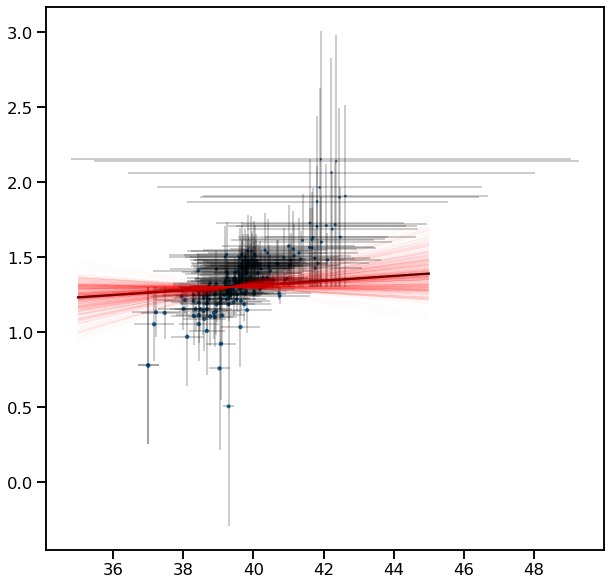

In [65]:
vmin, vmax = 35, 45
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.2, lw=0.1)

In [66]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(0.6787811141733651, 0.015849101065639998)

In [67]:
dfchain["alpha"].std(),dfchain["beta"].std()

(0.7733471963731882, 0.01966193972517017)

In [68]:
x,y,z=X,Y,Ye
X = sm.add_constant(x)
model = sm.WLS(y, X,weights=1./(z**2))
results = model.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            WLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.207
Date:                Thu, 16 Sep 2021   Prob (F-statistic):             0.0235
Time:                        10:57:39   Log-Likelihood:                 198.77
No. Observations:                 204   AIC:                            -393.5
Df Residuals:                     202   BIC:                            -386.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1392      0.071     16.043      0.0

In [69]:
Y, Ye, X, Xe = [GL, GLer, np.log10(GS), np.log10(GSer)]

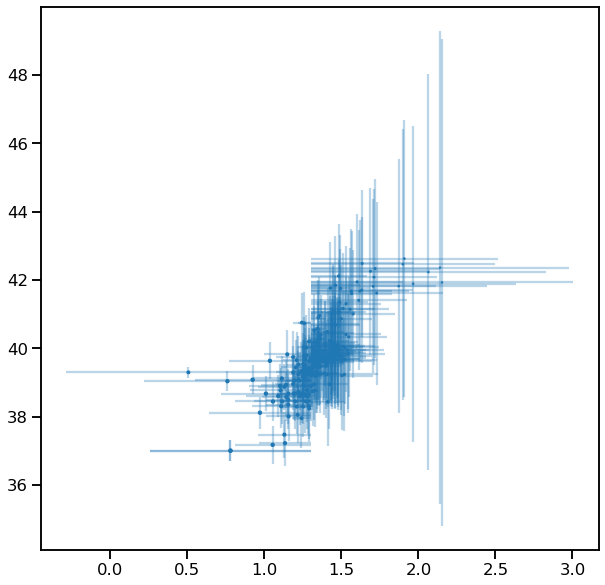

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", alpha=0.3)
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))

In [71]:
lm = linmix.LinMix(X, Y, Xe, Ye, K=2)

In [72]:
lm.run_mcmc()


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.22458062 1.22784748 1.08875095 1.01460436 1.13830082 1.13595426]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.46665016 1.46865017 1.20378777 1.08344673 1.35404373 1.27059365]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.65520075 1.65710678 1.29584818 1.1985894  1.48884551 1.36154783]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.74348437 1.74611015 1.40720628 1.22847795 1.57677738 1.40283077]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.62879722 1.6305584  1.38597905 1.25689314 1.65833562 1.32501754]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.60486985 1.60642041 1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.11003088 1.11023594 1.04055015 1.01378302 1.02877411 1.06013209]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.11145566 1.11166179 1.04104263 1.01307646 1.02802488 1.06099219]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.11226242 1.11246574 1.04109162 1.01248025 1.02731682 1.06023292]

Iteration:  5100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.11132131 1.11151319 1.04284154 1.0115809  1.02663597 1.06145954]

Iteration:  5200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.10974809 1.1099359  1.04287268 1.01082033 1.0259597  1.06166362]

Iteration:  5300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.10848372 1.1086

In [73]:
dfchain = pd.DataFrame.from_records(
    lm.chain.tolist(), 
    columns=lm.chain.dtype.names
)
dfchain

,alpha,beta,sigsqr,pi,mu,tausqr,mu0,usqr,wsqr,ximean,xisig,corr
0,-133.478383,132.805592,0.049171,"[0.02603633403407605, 0.973963665965924]","[1.2893793249040713, 1.3009069027779159]","[9.399771896612925e-06, 1.7886023201603616e-06]",1.300005,0.000093,0.000005,1.300607,0.002314,0.810984
1,-137.577780,135.929506,0.054880,"[0.003087544357259723, 0.9969124556427403]","[1.2867594071154187, 1.300807919374314]","[2.0370582220192586e-05, 2.0304373761172642e-06]",1.283207,0.000095,0.000005,1.300765,0.001642,0.689688
2,-145.301347,141.874736,0.062023,"[0.043917630365477876, 0.9560823696345222]","[1.2854605765596054, 1.3010194807286106]","[9.120219050267845e-05, 2.169071190279145e-06]",1.293862,0.000018,0.000015,1.300336,0.004030,0.916817
3,-132.703052,132.217306,0.063881,"[0.03424109685507293, 0.9657589031449272]","[1.2919890252173183, 1.3010927785249733]","[7.53443652490025e-05, 2.2898486781908436e-06]",1.300634,0.000446,0.000006,1.300781,0.002744,0.820567
4,-132.903493,132.338124,0.074440,"[0.03179716323730718, 0.9682028367626929]","[1.2907567611591093, 1.3011156619495312]","[0.00019480844211598522, 2.844655342497304e-06]",1.297120,0.000054,0.000012,1.300786,0.003500,0.861647
...,...,...,...,...,...,...,...,...,...,...,...,...
12195,-62.276482,78.287135,0.067174,"[0.9835553739972351, 0.016444626002764782]","[1.2988016186729596, 1.2673125196634178]","[1.3127010154330007e-05, 4.833879612943483e-05]",1.286879,0.000196,0.000041,1.298284,0.005454,0.854830
12196,-54.316005,72.137543,0.073755,"[0.9463080705863474, 0.05369192941365261]","[1.299368331452561, 1.2747032830403096]","[1.6329826518049388e-05, 7.59196012057637e-05]",1.292084,0.000304,0.000109,1.298044,0.007102,0.883541
12197,-55.680225,73.180571,0.071420,"[0.9749550033322173, 0.025044996667782742]","[1.2994004873340372, 1.2663556671973324]","[1.9363220316051817e-05, 3.665246295237792e-05]",1.274693,0.000130,0.000062,1.298573,0.006816,0.881460
12198,-52.238566,70.528273,0.064770,"[0.967087420243583, 0.03291257975641695]","[1.300009333700256, 1.2700774149612193]","[1.9714142515155992e-05, 1.0587250044523175e-05]",1.274172,0.000180,0.000033,1.299024,0.006923,0.886774


In [74]:
dfchain.describe()

,alpha,beta,sigsqr,mu0,usqr,wsqr,ximean,xisig,corr
count,12200.000000,12200.000000,12200.000000,12200.000000,1.220000e+04,1.220000e+04,12200.000000,12200.000000,12200.000000
mean,-83.649065,94.504161,0.035849,1.294065,6.523548e-04,3.065781e-05,1.300341,0.006106,0.897661
std,408.360282,313.938913,0.051468,0.020733,2.960379e-03,6.476720e-05,0.001442,0.004596,0.201003
min,-2347.009644,-5635.243353,0.000066,1.011624,5.210190e-10,4.684054e-10,1.291437,0.000054,-0.821660
25%,-155.207619,47.509636,0.006687,1.291561,9.338787e-06,1.408821e-06,1.299653,0.002655,0.883023
50%,-67.254068,81.898509,0.021941,1.298051,4.323652e-05,7.459027e-06,1.300544,0.004947,0.944098
75%,-22.472055,149.506329,0.044698,1.301206,2.297282e-04,2.997363e-05,1.301248,0.008235,0.982920
max,7368.278372,1834.726691,0.719194,1.581169,6.572668e-02,9.509093e-04,1.305933,0.032600,0.999894


In [75]:
pearsonr(X, Y)

(0.77510211505142, 3.80228362815389e-42)

In [76]:
pd.DataFrame({"X": X, "Xe": Xe, "Y": Y, "Ye": Ye}).describe()

,X,Xe,Y,Ye
count,204.000000,204.000000,204.000000,204.000000
mean,1.359637,0.058607,39.750147,1.304541
std,0.210025,0.210025,1.105695,0.880441
min,0.506911,-0.794119,37.000000,0.160650
25%,1.252489,-0.048541,39.156000,0.894250
50%,1.349277,0.048247,39.640500,1.117500
75%,1.460000,0.158970,40.148700,1.442016
max,2.153357,0.852327,42.622000,7.117500


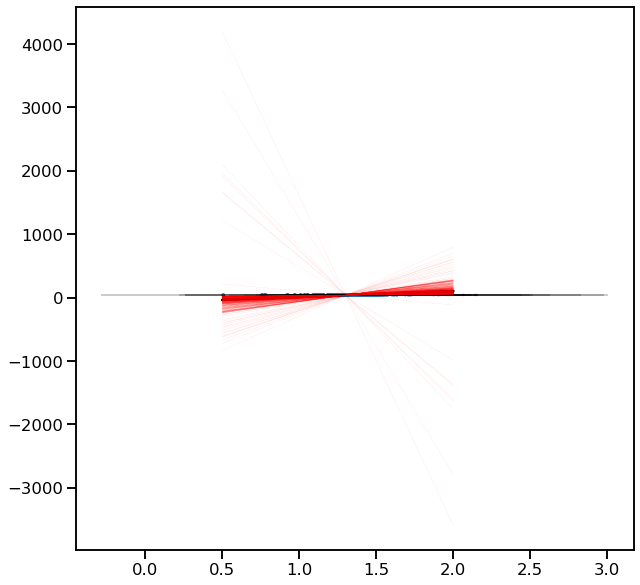

In [81]:
vmin, vmax = 0.5, 2
xgrid = np.linspace(vmin, vmax, 200)


fig, ax = plt.subplots(figsize=(10, 10))

ax.errorbar(X, Y, xerr=Xe, yerr=Ye, ls=" ", elinewidth=0.4, alpha=1.0, c="k")
ax.scatter(X, Y, marker=".", s=20/np.hypot(Xe, Ye))
# The original fit
ax.plot(xgrid, dfchain["alpha"].mean() + xgrid*dfchain["beta"].mean(), 
        '-', c="k")
for samp in lm.chain[::20]:
    ax.plot(xgrid, samp["alpha"] + xgrid*samp["beta"], 
        '-', c="r", alpha=0.4, lw=0.1)


In [78]:
dfchain["alpha"].mean(),dfchain["beta"].mean()

(-83.64906516779082, 94.50416093907307)

In [79]:
dfchain["alpha"].std(),dfchain["beta"].std()

(408.3602819025197, 313.938912970497)

In [80]:
print("--- %s seconds ---" % (time.time()-start_time))


--- 95.17125868797302 seconds ---
